## 接線の方程式

- 接線
  - 関数$f(x)$上の点$(a, f(a))$を通り、傾きが$f'(a)$の直線。

$y = f(x)$の点$x=a$における接点の方程式は
$$y = f'(a)(x - a) + f(a)$$

In [6]:
# 接点の方程式を求める関数

from sympy import symbols, diff, init_printing
init_printing(use_latex='mathjax')
x = symbols('x')

def line_tangent(f,a):
    return diff(f,x).subs(x,a)*(x-a) + f.subs(x,a)


In [13]:
line_tangent(x**2, 2)

4⋅x - 4

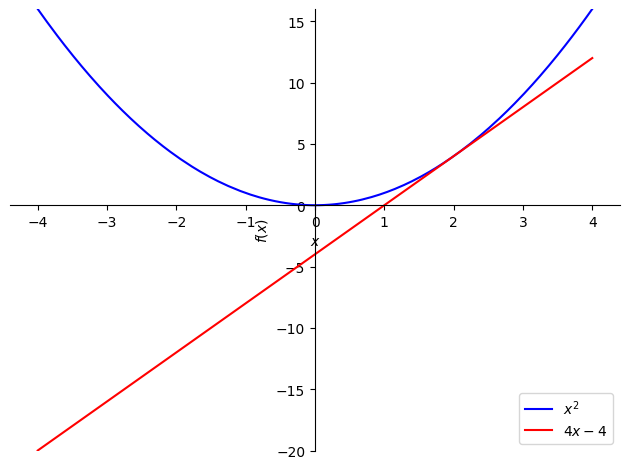

In [15]:
from sympy.plotting import plot

a = 2

p = plot(x**2, line_tangent(x**2, a), (x, -4, 4),
         show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.ylim = (-20, 16)
p.show()

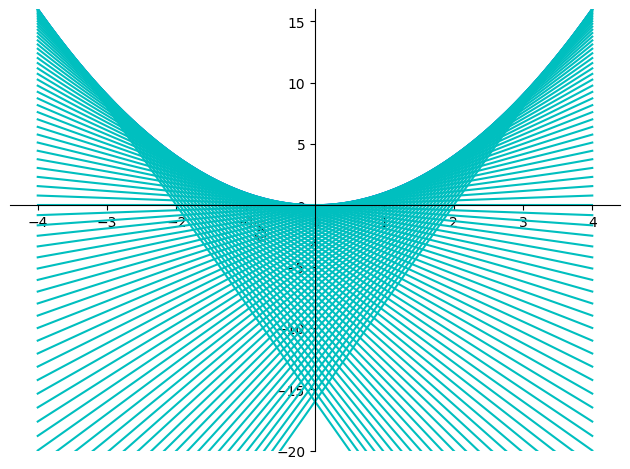

In [19]:
import numpy as np

p = plot(x**2, (x,-4, 4), show=False)
p[0].line_color = 'b'

for a in np.arange(-4, 4.1, 0.1):
    _p = plot(line_tangent(x**2, a), (x, -4,4), show=False)
    _p[0].line_color = 'c'
    p.append(_p[0])

p.ylim = (-20, 16)
p.show()

# 関数の増減-極大と極小
## 3次関数の増減

3次関数
$$g(x) = 2x^3 - 3x^2 -12x + 5$$
を考える

In [20]:
g = 2*x**3 - 3*x**2 -12*x +5
g

   3      2           
2⋅x  - 3⋅x  - 12⋅x + 5

In [22]:
dg = diff(g, x)
dg

   2           
6⋅x  - 6⋅x - 12

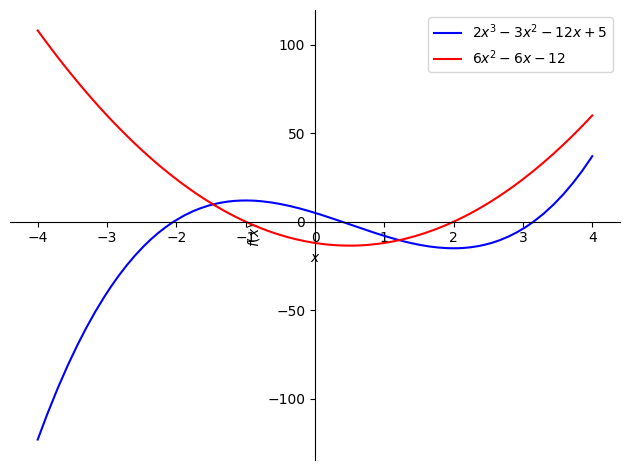

In [23]:
p = plot(g, dg, (x,-4,4),show=False, legend=True)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

In [24]:
from sympy import solveset

extremum_pt = solveset(dg)
extremum_pt

{-1, 2}

In [25]:
g.subs(x, extremum_pt.args[0])

12

In [26]:
g.subs(x, extremum_pt.args[1])

-15

## 関数の近似

### 一次近似
近似に使用する一次式には接線の方程式が使える。
$$y = f'(a)(x - a) + f(a)$$
この直線は$x=a$で$f_(x)$に接する線であるから、$x$が$a$に近い$x \simeq a$の領域で、$f_(a)$を再現しているとみなす。<br>
この接線を$x \simeq a$における$y = f_(x)$の一次近似という。

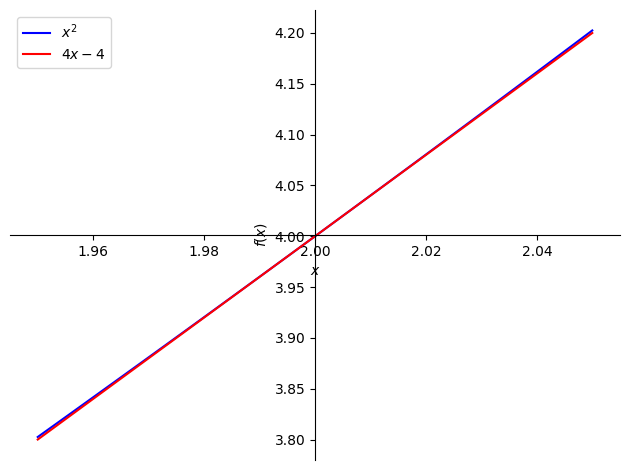

In [30]:
a = 2
d = 0.05
p = plot(x**2, line_tangent(x**2, a), (x, a- d, a+d), legend=True, show=False)

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

In [31]:
n = symbols('n')
fn = (1+x)**n

# x = 0の一次近似直線
fn.diff(x).subs(x,0) * x + fn.subs(x,0)

n⋅x + 1

In [49]:
100 * (1 + 0.02/100)**30

100.60174325238931

In [48]:
100 *(n *x+1).subs([(x,0.02/100), (n,30)])

100.600000000000

In [53]:
def lin_approx(f,a):
    return f.diff(x).subs(x, a) * (x - a) + f.subs(x,a)

In [54]:
from sympy import sin
lin_approx(sin(x),0)

x

## テイラー展開
一次近似で使用する一次式は直線なので、曲線や凹凸の曲線を持つ関数の形を表現できない。<br>
曲線的な関数の近似を行うには曲線を表現する2次以上の項を取り入れる必要がある。ここでテイラー展開の出番。<br>
テイラー展開は2次以上の高次の項を含めた関数の近似式。
$$\displaystyle f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n$$
特に$n=0$のときをマクローリン展開と呼ぶ。

In [66]:
from sympy import factorial

def taylor_expand(f, a,n):
    _series = 0
    for i in range(n +1):
        _series = _series + f.diff(x, i).subs(x,a) * (x - a)**(i) / factorial(i)

    return _series

In [71]:
from sympy import exp
taylor_expand(exp(x), 0, 4)

 4    3    2        
x    x    x         
── + ── + ── + x + 1
24   6    2         

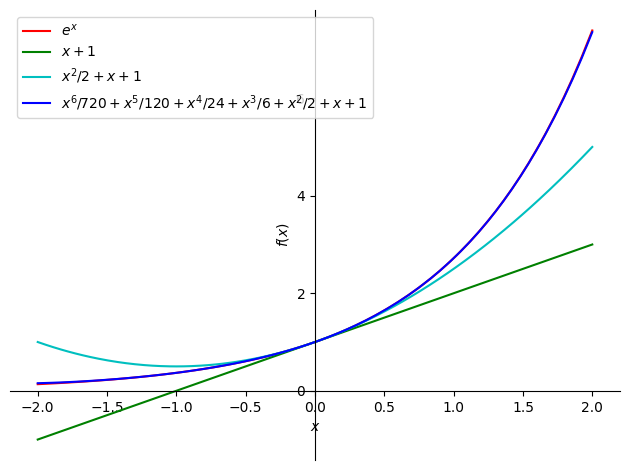

In [77]:
p = plot(exp(x),
         taylor_expand(exp(x), 0,1),
         taylor_expand(exp(x),0, 2),
         taylor_expand(exp(x), 0, 6),
         (x, -2, 2),
         show=False, legend=True)

p[0].line_color = 'r'
p[1].line_color = 'g'
p[2].line_color = 'c'
p[3].line_color = 'b'

p.show()

In [78]:
taylor_expand(sin(x), 0,6)

  5    3    
 x    x     
─── - ── + x
120   6     

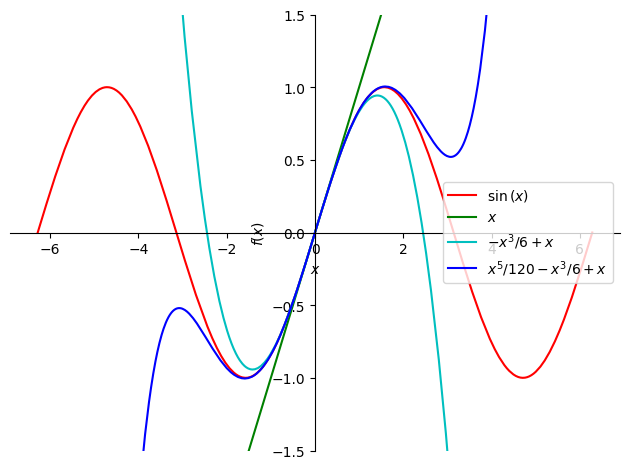

In [82]:
from sympy import pi
p = plot(sin(x),
         taylor_expand(sin(x), 0,1),
         taylor_expand(sin(x),0, 3),
         taylor_expand(sin(x), 0, 5),
         (x, -2*pi, 2*pi),
         show=False, legend=True)

p[0].line_color = 'r'
p[1].line_color = 'g'
p[2].line_color = 'c'
p[3].line_color = 'b'
p.ylim = (-1.5, 1.5)

p.show()

In [85]:
from sympy import cos, series
series(cos(x),x, 0 ,6)

     2    4        
    x    x     ⎛ 6⎞
1 - ── + ── + O⎝x ⎠
    2    24        

In [83]:
taylor_expand(cos(x), 0,6)

    6    4    2    
   x    x    x     
- ─── + ── - ── + 1
  720   24   2     

## オイラーの公式
テイラー展開する
$$ e^{ix} = \cos x + i\sin x$$
$i$は虚数。($i^2 = -1$)<br>
オイラーの公式は指数関数と三角関数の関係性を示す重要な式である。

In [86]:
from sympy import I

I**2

-1

In [87]:
series(exp(I*x), x)

           2      3    4      5        
          x    ⅈ⋅x    x    ⅈ⋅x     ⎛ 6⎞
1 + ⅈ⋅x - ── - ──── + ── + ──── + O⎝x ⎠
          2     6     24   120         

In [90]:
from sympy import collect

collect(series(exp(I*x),x).removeO(), I)

 4    2     ⎛  5    3    ⎞    
x    x      ⎜ x    x     ⎟    
── - ── + ⅈ⋅⎜─── - ── + x⎟ + 1
24   2      ⎝120   6     ⎠    

$e^{ix}$をテイラー展開した結果、$\cos x + i\sin x$が成立することがわかる。